In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os


Using TensorFlow backend.


In [2]:
# 데이터셋 디렉터리 경로
dataset_dir = r'./dataset/caltech101'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir,'validation')
test_dir = os.path.join(dataset_dir,'test')

#사진 크기
image_width=100
image_height=100

#imageDataGenerator초기화
#0~1 사이로 숫자값변경
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#훈련셋 제너레이터
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (image_width, image_height),batch_size=30, class_mode = 'categorical')

#검증셋 제너레이터
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(image_width, image_height), batch_size=30, class_mode='categorical')

#테스트셋 제너레이터
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(image_width, image_height),batch_size=30, class_mode='categorical')

Found 1800 images belonging to 10 classes.
Found 600 images belonging to 10 classes.
Found 600 images belonging to 10 classes.


In [3]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [4]:
train_generator

In [5]:
# 훈련셋에서 배치를 생성
for data_batch, labels_batch in train_generator:
    break

In [7]:
# 데이터 배치의 크기
# 컬러기 때문에 RGB 3개 채널 존재
data_batch.shape

(30, 100, 100, 3)

In [8]:
# 라벨 배치의 크기
labels_batch.shape

(30, 10)

In [9]:
# 첫번째 데이터 배치 출력
data_batch[0]

array([[[0.04705883, 0.00392157, 0.03529412],
        [0.02745098, 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        ...,
        [0.        , 0.00392157, 0.00784314],
        [0.03921569, 0.04313726, 0.02352941],
        [0.00392157, 0.        , 0.        ]],

       [[0.03137255, 0.        , 0.01960784],
        [0.02745098, 0.        , 0.        ],
        [0.03137255, 0.03137255, 0.        ],
        ...,
        [0.01960784, 0.03529412, 0.04705883],
        [0.        , 0.        , 0.        ],
        [0.08235294, 0.07843138, 0.0627451 ]],

       [[0.05490196, 0.01176471, 0.03529412],
        [0.05490196, 0.03529412, 0.01960784],
        [0.18431373, 0.19215688, 0.14901961],
        ...,
        [0.8745099 , 0.8941177 , 0.9176471 ],
        [0.04313726, 0.03921569, 0.05882353],
        [0.00784314, 0.        , 0.00392157]],

       ...,

       [[0.01568628, 0.01960784, 0.02745098],
        [0.03137255, 0.03921569, 0.03529412],
        [0.04705883, 0

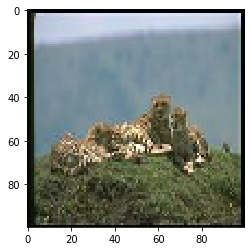

In [10]:
# 첫번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()

In [11]:
# 첫 번재 라벨 배치 출력
labels_batch[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [12]:
# 라벨이름 목록
labels_list = train_generator.class_indices
labels_list

{'airplane': 0,
 'bonsai': 1,
 'car': 2,
 'chandelier': 3,
 'face': 4,
 'ketch': 5,
 'leopard': 6,
 'motorbike': 7,
 'turtle': 8,
 'watch': 9}

In [13]:
# 라벨 이름 목록 스왑
labels_list = dict((value,key)for key,value in labels_list.items())
labels_list

{0: 'airplane',
 1: 'bonsai',
 2: 'car',
 3: 'chandelier',
 4: 'face',
 5: 'ketch',
 6: 'leopard',
 7: 'motorbike',
 8: 'turtle',
 9: 'watch'}

In [14]:
# 첫 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[0])]

'leopard'

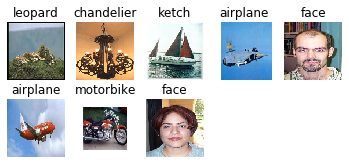

In [15]:
# 출력할 크기 설정
rows=3
columns=5

# 사진과 라벨 이름을 목록으로 출력
for num, img in enumerate(data_batch):
    if num>=rows+columns:
        break
    plt.subplot(rows,columns,num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)
    

In [16]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (image_width, image_height,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))

    model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',metrics=['acc'])
    return model

In [18]:
# 모델 생성
model = build_model()

# 훈련 시작
history = model.fit_generator(train_generator,steps_per_epoch=60,epochs=10, validation_data = validation_generator, validation_steps=20)

Epoch 1/10
60/60 [==============================] - 10s 171ms/step - loss: 1.4334 - acc: 0.5461 - val_loss: 0.7362 - val_acc: 0.7917
Epoch 2/10
60/60 [==============================] - 10s 166ms/step - loss: 0.4959 - acc: 0.8444 - val_loss: 0.1998 - val_acc: 0.9200
Epoch 3/10
60/60 [==============================] - 10s 172ms/step - loss: 0.2865 - acc: 0.9072 - val_loss: 0.0622 - val_acc: 0.9167
Epoch 4/10
60/60 [==============================] - 11s 180ms/step - loss: 0.1928 - acc: 0.9411 - val_loss: 0.1580 - val_acc: 0.9367
Epoch 5/10
60/60 [==============================] - 11s 177ms/step - loss: 0.1157 - acc: 0.9611 - val_loss: 0.4243 - val_acc: 0.9350
Epoch 6/10
60/60 [==============================] - 11s 179ms/step - loss: 0.0683 - acc: 0.9767 - val_loss: 0.4371 - val_acc: 0.9267
Epoch 7/10
60/60 [==============================] - 11s 178ms/step - loss: 0.0465 - acc: 0.9833 - val_loss: 0.0565 - val_acc: 0.9517
Epoch 8/10
60/60 [==============================] - 11s 182ms/step - 

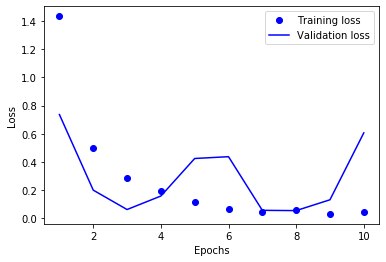

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

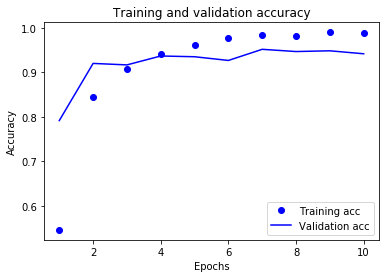

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [21]:
results = model.evaluate_generator(test_generator)
results

[0.34719181060791016, 0.9566666483879089]

In [23]:
results = model.predict_generator(test_generator)
results

array([[3.27402631e-06, 2.44523637e-08, 9.99355376e-01, ...,
        2.52641978e-08, 3.30660350e-06, 6.37542107e-04],
       [3.31549831e-02, 1.90995354e-02, 8.65419119e-13, ...,
        5.03396791e-08, 3.87131935e-04, 8.08099449e-01],
       [8.35648758e-17, 1.96622286e-20, 6.11890900e-27, ...,
        1.00000000e+00, 1.13191615e-13, 5.93247836e-21],
       ...,
       [2.44909793e-01, 1.41621695e-06, 3.46412453e-05, ...,
        7.79028881e-07, 7.69432575e-07, 2.07679438e-08],
       [5.56005632e-12, 1.32841709e-13, 4.42814006e-23, ...,
        1.00000000e+00, 1.43899725e-12, 2.85775940e-14],
       [9.99998093e-01, 8.50780724e-10, 1.79154983e-06, ...,
        1.34645873e-07, 2.20076011e-08, 2.01891958e-11]], dtype=float32)

In [24]:
results = np.argmax(results,1)

In [25]:
results

array([2, 9, 7, 4, 7, 9, 7, 8, 7, 0, 4, 4, 0, 9, 0, 7, 0, 1, 4, 8, 4, 7,
       4, 7, 2, 6, 2, 4, 0, 4, 7, 4, 0, 7, 8, 7, 8, 6, 4, 6, 7, 7, 7, 7,
       9, 0, 7, 0, 1, 6, 7, 4, 7, 6, 6, 1, 6, 8, 5, 0, 6, 4, 0, 2, 7, 7,
       7, 9, 0, 0, 7, 0, 0, 6, 7, 6, 7, 9, 7, 1, 0, 4, 6, 0, 0, 6, 1, 4,
       7, 7, 7, 7, 1, 1, 4, 7, 2, 7, 4, 7, 0, 7, 1, 1, 5, 7, 0, 0, 5, 4,
       4, 7, 7, 0, 0, 4, 7, 7, 9, 4, 0, 7, 8, 1, 3, 2, 7, 0, 0, 7, 1, 4,
       1, 4, 0, 9, 2, 0, 4, 4, 5, 7, 5, 7, 2, 3, 4, 7, 7, 0, 1, 7, 0, 0,
       4, 4, 0, 6, 0, 7, 7, 6, 7, 0, 5, 0, 0, 9, 7, 0, 9, 9, 3, 6, 7, 7,
       7, 7, 7, 6, 3, 7, 3, 6, 0, 4, 4, 7, 0, 0, 0, 7, 7, 0, 0, 6, 7, 1,
       7, 7, 0, 8, 9, 4, 0, 4, 9, 9, 0, 7, 1, 5, 0, 0, 4, 1, 0, 0, 4, 7,
       4, 6, 0, 0, 0, 0, 0, 8, 0, 2, 5, 7, 0, 7, 1, 9, 4, 0, 7, 7, 0, 0,
       2, 0, 9, 0, 7, 0, 7, 4, 4, 5, 0, 7, 7, 7, 7, 0, 2, 7, 7, 8, 6, 0,
       0, 0, 7, 0, 0, 7, 0, 7, 4, 7, 1, 7, 9, 7, 7, 9, 0, 5, 4, 8, 7, 0,
       7, 1, 6, 5, 0, 0, 9, 7, 7, 0, 0, 3, 7, 2, 0,

In [26]:
results.shape

(600,)

In [27]:
# 테스트셋에서 배치를 생성
for data_batch, label_batch in test_generator:
    break

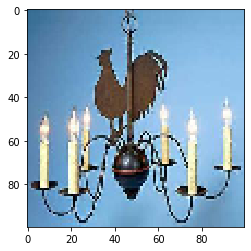

In [29]:
#테스트셋의 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()

In [30]:
# 테스트셋 배치 데이터를 예측
results = model.predict(data_batch)
# 테스트셋의 첫 번째 라벨 이름 출력
labels_list[np.argmax(results[0])]

'ketch'